<a href="https://colab.research.google.com/github/Fraz-Rasool/Test/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class Intervals, Boundries, Class Marks, Tally

In [3]:
import math
import pandas as pd

# Sample data
data = [8,7,6,8,18,7,12,54,89,67,45,90,12]

# Calculating the minimum and maximum values in the data to define class range
min_val = min(data)
max_val = max(data)

# Defining the number of classes and calculating class width
num_classes = 4  # Number of class intervals
class_width = math.ceil((max_val - min_val) / num_classes)

# Creating class intervals based on the minimum value and class width
class_intervals = [(min_val + i * class_width, min_val + (i + 1) * class_width - 1) for i in range(num_classes)]

# Counting how many data points fall into each class interval
frequencies = [sum(lower <= x <= upper for x in data) for lower, upper in class_intervals]

# Calculating class boundaries
class_boundaries = [(lower - 0.5, upper + 0.5) for lower, upper in class_intervals]

# Computing class marks
class_marks = [(lower + upper) / 2 for lower, upper in class_intervals]

# Generating tally marks
tally_marks = ['|' * freq for freq in frequencies]

# Organizing the data into a pandas DataFrame for a structured frequency distribution table
df = pd.DataFrame({
    'Class Interval': [f'{lower}-{upper}' for lower, upper in class_intervals],  # Class intervals
    'Class Boundaries': [f'{lower}-{upper}' for lower, upper in class_boundaries],  # Boundaries of each class
    'Class Mark': class_marks,  # Midpoint of each class interval
    'Frequency': frequencies,  # Frequency of data points in each class
    'Tally': tally_marks  # Tally marks for visual representation of frequencies
})

# Display the frequency distribution table
print(df)

  Class Interval Class Boundaries  Class Mark  Frequency     Tally
0           6-26         5.5-26.5        16.0          8  ||||||||
1          27-47        26.5-47.5        37.0          1         |
2          48-68        47.5-68.5        58.0          2        ||
3          69-89        68.5-89.5        79.0          1         |


Histogram

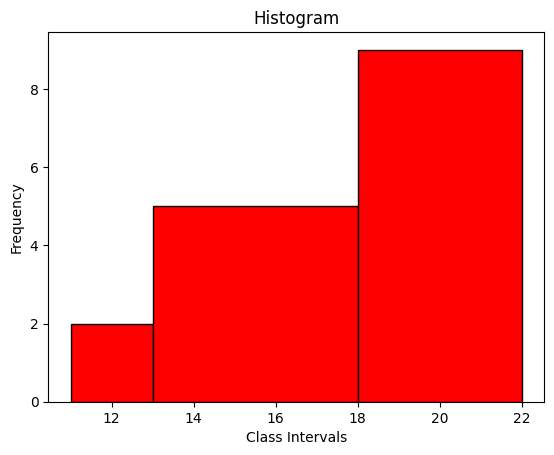

In [4]:
import matplotlib.pyplot as plt

# Grouped data (Class Intervals and Frequencies)
frequencies = [2, 5, 9]
bounds = [11, 13, 18, 22]  # Boundaries of the class intervals

# Use only the frequencies and bin the data properly
plt.hist(bounds[:-1], bins=bounds, weights=frequencies,color='Red', edgecolor='Black')  # bins[:-1] takes all but the last bin
plt.title('Histogram')
plt.xlabel('Class Intervals')
plt.ylabel('Frequency')
plt.show()


Polygon

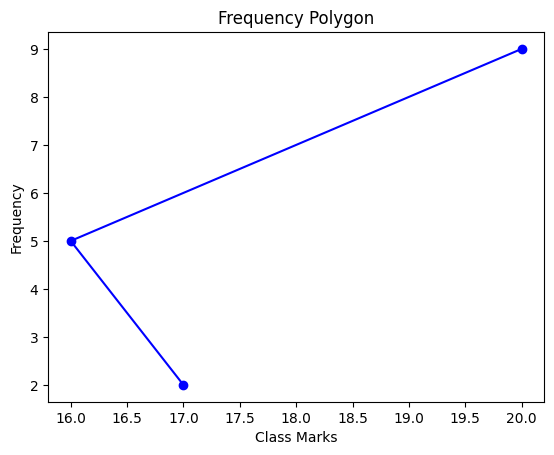

In [5]:
# Class marks
class_marks = [17, 16, 20]
# Simple Frequency Polygon
plt.plot(class_marks, frequencies, marker='o', linestyle='-', color='blue')
plt.title('Frequency Polygon')
plt.xlabel('Class Marks')
plt.ylabel('Frequency')
plt.show()


Commulative Frequency Polygon

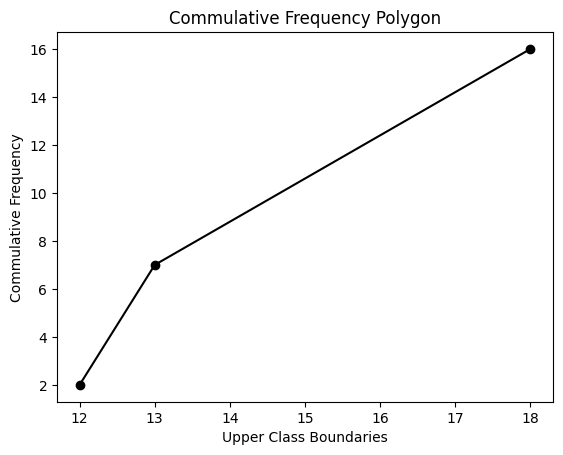

In [6]:
import numpy as np
frequencies = [2, 5, 9]
commulative_frequencies = np.cumsum(frequencies)
upper_class_boundaries = [12, 13, 18]
# Commulative Frequency Polygon
plt.plot(upper_class_boundaries, commulative_frequencies, marker='o', linestyle='-', color='Black')
plt.title('Commulative Frequency Polygon')
plt.xlabel('Upper Class Boundaries')
plt.ylabel('Commulative Frequency')
plt.show()


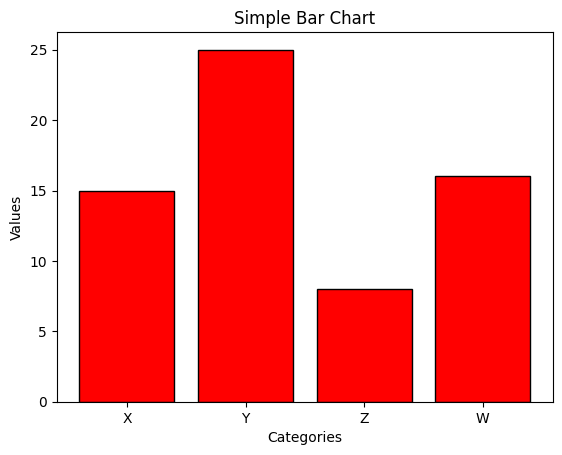

In [7]:
import matplotlib.pyplot as plt
# Data
categories = ['X', 'Y', 'Z', 'W']
values = [15, 25, 8, 16]
# Simple Bar Chart
plt.bar(categories, values, color='red',edgecolor='Black')
plt.title('Simple Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

Multiple Bar Chart

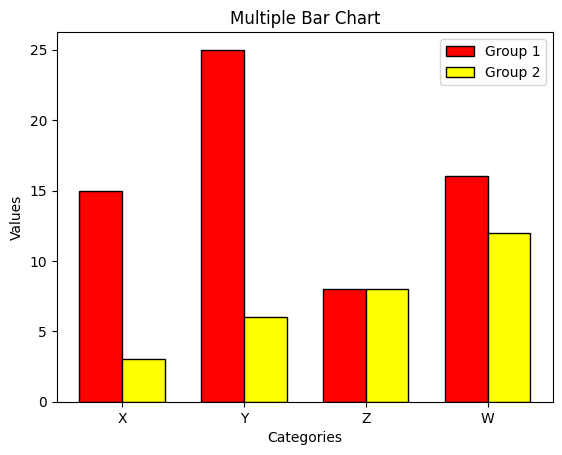

In [8]:
import numpy as np

# Adding a second set of values for comparison
values2 = [3,6,8,12]
index = np.arange(len(categories))
bar_width = 0.35

# Multiple Bar Chart
plt.bar(index, values, bar_width, label='Group 1', color='Red', edgecolor='Black')
plt.bar(index + bar_width, values2, bar_width, label='Group 2', color='Yellow', edgecolor='Black')

plt.title('Multiple Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, categories)
plt.legend()
plt.show()



Component Bar Chart

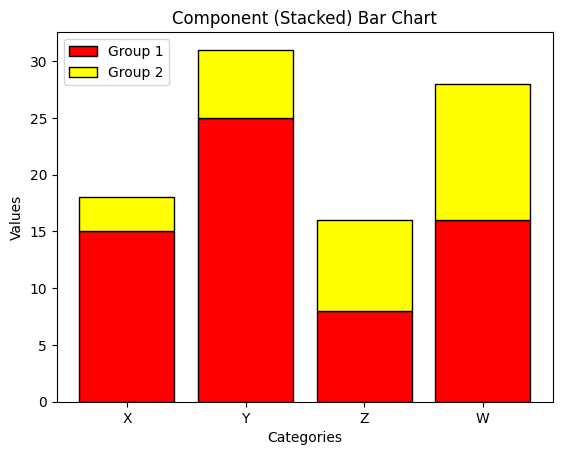

In [9]:
# Component Bar Chart
plt.bar(categories, values, label='Group 1', color='Red', edgecolor='Black')
plt.bar(categories, values2, bottom=values, label='Group 2', color='Yellow', edgecolor='Black')

plt.title('Component (Stacked) Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

Pie Chart

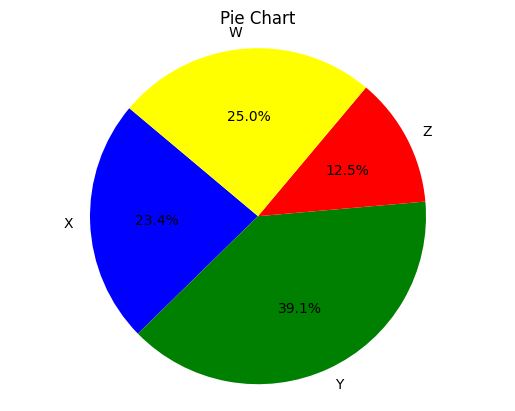

In [10]:
# Pie Chart
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'yellow'])
plt.title('Pie Chart')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

Mode mean

In [11]:
import numpy as np
from scipy import stats
from collections import Counter

# Ungrouped Data
ungrouped_data = [12, 15, 18, 21, 12, 15, 18, 21, 12]

# 1. Arithmetic Mean
arithmetic_mean = np.mean(ungrouped_data)

# 2. Geometric Mean
geometric_mean = stats.gmean(ungrouped_data)

# 3. Harmonic Mean
harmonic_mean = stats.hmean(ungrouped_data)

# 4. Median
median = np.median(ungrouped_data)

# 5. Mode
mode_result = stats.mode(ungrouped_data)

# Print the mode result for debugging
print("Mode Result:", mode_result)



# Custom mode function
def calculate_mode(data):
    data_count = Counter(data)
    mode_data = data_count.most_common(1)  # Get the most common item
    return mode_data[0] if mode_data else (None, 0)  # Return mode and count

# Calculate mode and count using custom function
mode, mode_count = calculate_mode(ungrouped_data)

# Output results
arithmetic_mean, geometric_mean, harmonic_mean, median, mode, mode_count


Mode Result: ModeResult(mode=12, count=3)


(16.0, 15.626317733002278, 15.262449528936742, 15.0, 12, 3)

For Grouped Data

In [12]:
# Grouped Data
class_intervals = ['13-18', '19-24', '25-30']
frequencies = [2, 5, 9]
class_marks = [14, 19, 24]  # Midpoints of class intervals

# Calculate total frequency
total_frequency = sum(frequencies)

# 1. Arithmetic Mean
arithmetic_mean_grouped = sum(f * x for f, x in zip(frequencies, class_marks)) / total_frequency

# 2. Geometric Mean
# Geometric Mean for grouped data = exp(sum(f * log(x)) / total_frequency)
geometric_mean_grouped = np.exp(sum(f * np.log(x) for f, x in zip(frequencies, class_marks)) / total_frequency)

# 3. Harmonic Mean
# Harmonic Mean for grouped data = total_frequency / sum(f / x)
harmonic_mean_grouped = total_frequency / sum(f / x for f, x in zip(frequencies, class_marks) if x != 0)

# 4. Median
cumulative_frequencies = np.cumsum(frequencies)
median_index = total_frequency / 2

# Find median class
median_class = class_marks[np.where(cumulative_frequencies >= median_index)[0][0]]
median = median_class  # We can refine this based on interpolation

# 5. Mode
mode_class = class_marks[np.argmax(frequencies)]
mode = mode_class  # Mode for grouped data is the class with the highest frequency

arithmetic_mean_grouped, geometric_mean_grouped, harmonic_mean_grouped, median, mode

(21.1875, 20.856687219252773, 20.486161251504214, 24, 24)

Quartile

In [13]:
import numpy as np

# Sample data (replace with your actual data)
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Replace with your data
n = len(data)
# Quartiles
Q1 = np.percentile(data, 20)
Q2 = np.percentile(data, 40)
Q3 = np.percentile(data, 60)

print("Quantile 1 (Q1):", Q1)
print("Quantile 2 (Q2):", Q2)
print("Quantile 3 (Q3):", Q3)

# Interquartile Range (IQR)
IQR = Q3 - Q1
print("The Interquartile Range (IQR) is:", IQR)

Quantile 1 (Q1): 2.8
Quantile 2 (Q2): 4.6
Quantile 3 (Q3): 6.3999999999999995
The Interquartile Range (IQR) is: 3.5999999999999996


In [14]:
# Deciles
D1 = np.percentile(data, 10)
D2 = np.percentile(data, 20)
D3 = np.percentile(data, 30)
D4 = np.percentile(data, 40)

print("Decile 1 (D1):", D1)
print("Decile 2 (D2):", D2)
print("Decile 3 (D3):", D3)
print("Decile 4 (D4):", D4)

Decile 1 (D1): 1.9
Decile 2 (D2): 2.8
Decile 3 (D3): 3.6999999999999997
Decile 4 (D4): 4.6


In [15]:
# Quartile Deviation (QD)
QD = IQR / 2
print("The Quartile Deviation (QD) is:", QD)

The Quartile Deviation (QD) is: 1.7999999999999998


In [16]:
# Arithmetic Mean and Mean Deviation (MD)
arithmetic_mean = sum(data) / n
MD = sum(abs(x - arithmetic_mean) for x in data) / n
print("The Mean Deviation (MD) of the given data is:", MD)

# Coefficient of Mean Deviation (CMD)
CMD = (MD / arithmetic_mean) * 100
print("The Coefficient of Mean Deviation (CMD) in % is:", CMD, "%")

The Mean Deviation (MD) of the given data is: 2.5
The Coefficient of Mean Deviation (CMD) in % is: 45.45454545454545 %


In [17]:
std_dev = np.std(data)

# Calculate the arithmetic mean
arithmetic_mean = np.mean(data)

# Calculate the coefficient of variation
coefficient_of_variation = (std_dev / arithmetic_mean) * 100

print(f"The coefficient of variation is: {coefficient_of_variation:.2f}%")

The coefficient of variation is: 52.22%


In [20]:
coefficient_of_sd = (std_dev / arithmetic_mean)

print(f"The coefficient of standard deviation is: {coefficient_of_sd:.2f}%")

The coefficient of standard deviation is: 0.52%


In [23]:
KPM = (3*(arithmetic_mean-median)-std_dev)
KPM

-58.372281323269014

In [24]:
Q1 = np.percentile(data, 20)
Q2 = np.percentile(data, 40)
Q3 = np.percentile(data, 60)

bowley_skewness = (Q1 + Q3 - 2 * Q2) / (Q3 - Q1)

print("Bowley's Coefficient of Skewness:", bowley_skewness)

Bowley's Coefficient of Skewness: 0.0


In [25]:
from scipy.stats import moment

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


df = pd.Series(data)
df

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [26]:
m1 = df.mean()
m2 = moment(data, moment=2)
m3 = moment(data, moment=3)
m4 = moment(data, moment=4)

print(f"m1 (Mean): {m1}")
print(f"m2 (Variance): {m2}")
print(f"m3 (Skewness): {m3}")
print(f"m4 (Kurtosis): {m4}")

m1 (Mean): 5.5
m2 (Variance): 8.25
m3 (Skewness): 0.0
m4 (Kurtosis): 120.8625
